<h1>Image Processing and Handling WS 2018/19</h1>

Exercise instructor: Marko Jovanović, mjovanovic@mi.rwth-aachen.de

<strong style="color: red">Notice: </strong>Attendance to <strong>all</strong> exercises sessions <strong>is mandatory</strong>. However, submitted exercise solutions aren't graded nor they present a prerequiste for the exam, but you will receive feedback on your submitted solutions.

The exercise sessions are held from 12.30-14.00 on the following dates at COMA 1:

22.10.2018 - OpenCV and Python intro (this session)<br />
05.11.2018 - Image Enhancement<br />
19.11.2018 - Fourier Transform<br />
<strong>03.12.2018 - Low-level Image Segmentation</strong><br />
17.12.2018 - High-level Image Segmentation<br />
14.01.2019 - Visualization<br />
21.01.2019 - Automation<br />
28.01.2019 - Solving a Problem<br />

The topics are an orientation and subject to change, in accordance with the lectures.

<h2>Exercise 4: Low-level Image Segmentation</h2>

Due date: <strong>10.12.2018</strong>

<h3>List of Tasks</h3>
<ul>
    <li><a href="#task1">Task 1: Pixel-based segmentation</a></li>
    <li><a href="#task2">Task 2: More Advanced Low-level Segmentation</a></li>
    <li><a href="#task3">Task 3: Edge-Based Segmentation</a></li>
    <li><a href="#task4">Task 4: Graph-cut Segmentation</a></li>
</ul>

<h3>Segmentation</h3>

The goal of segmentation can be understood as identifying pixels in an image which are meant to be grouped together. Segmenting an image means to represent it into something more meaningful for a certain task and thus making it easier to analyze. In medical image processing, segmentation is used for many different tasks, such as, but not limited to:
<ul>
    <li>tumor location, pathologies location</li>
    <li>measurement of tissue volumes</li>
    <li>diagnosis support and support of clinical trials</li>
    <li>surgery planning</li>
    <li>virtual surgery simulation</li>
    <li>intra-surgery navigation</li>
</ul>

Depending on the quality requirements and  abstract levels at which segmentation procedure applies, there ar e many different segmentation methods. During this exercise, you will learn some low-level segmentation methods and train to implement them using OpenCV.
<a name="task1"></a>
<h3 style="color: red">Task 1: Pixel-based segmentation</h3>

The simplest method of image segmentation is claled thresholding. This method is based on a threshold value (clip-level), which is used to convert a grayscale imate into a binary image, resulting in a segmentation foreground and background.
The approach is very easy to follow: Each pixel in the image is replaced with a black pixel (representing the background) if the image intensity $I_{i,j}$ is less than the fixed threshold $T$ ($I_{i,j} < T$, otherwise the pixel is set white (thus representing the foreground). The process is also known as <em>binarization</em>.

<strong style="color: red">Programming Task:</strong>
Implement this very simple approach for binarizing the image cell.png. Do not use any special functions, but follow the explained approach. Which threshold value works best?

In [ ]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('cell.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
cimg = img 
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

OpenCV offers the <code>threshold()</code> function to apply a threshold for image binarization. Conveniently, the function offers five different modes of thresholding, which is set with its fifth argument:
<ul>
    <li>Binary thresholding with <code>THRESH_BINARY</code></li> - if $I_{i,j} > T$, assign to the pixel som chosen maximal value, otherwise zero.
    <li>Binary inverted thresholding with <code>THRESH_BINARY_INV</code></li> - inverted version of binary thresholding, values are set to 0 if $I_{i,j} > T$, otherwise set to some chosen maximal value.
    <li>Truncated thresholding with <code>THRESH_TRUNC</code></li> - all values below $T$ are kept, values of pixels with $I_{i,j} > T$ are set to $T$
    <li>Thresholding to zero with <code>THRESH_TOZERO</code></li> - all values above threshold $T$ are kept, values of pixels with $I_{i,j} < T$ are set to 0.
    <li>Binary thresholding with <code>THRESH_TOZERO_INV</code></li> - all values below threshold $T$ are kept, values of pixels with $I_{i,j} > T$ are set to 0.
</ul>

<img src="thresholding.jpg" />

<strong>Figure 1.</strong> Top row: without applied CLAHE, bottom row: with CLAHE applied. (a,g) original image; (b,h) applied binary thresholding; (c,i) inverted binary thresholding; (d,j) truncated; (e,k) threshold to zero; (f,l) threshold to zero inverted.

<strong style="color: red">Programming Task:</strong> Using OpenCV's <code>threshold()</code> function, implement the same procedure again. Lookup OpenCV's documentation to find out about its arguments.

In [ ]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('cell.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
cimg = img 
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

During the lecture you have been presented Otsu's method (Noboyuki Otsu) for image binarization, which assumes that the image contains two classes of pixels following a bi-modal histogram, each mode representing the foreground and the background. Here, bi-modal means simply that the image has two peaks in the histogram: one representing the foreground values, the other the background values occuring in the image. The method finds the optimum threshold by separating the two modes such that their combined spread (intra-class variance) is minimal, or, equivalently, such that their inter-class variance is maximal. Intuitively speaking in simple terms, it finds the optimum middle value separating the two modes in the histogram.

<strong style="color: red">Programming Task:</strong> Implement Otsu's method. Do not use functions provided by OpenCV.


You will need to search for the threshold $T$ that minimizes the intra-class variance $\sigma_{within}$ of the two classes separated by T:

$$ \sigma^2_{intra}(T) = n_1(T)\sigma_1^2 + n_2(T)\sigma^2_2(T)$$
where $n_1(T)$ is the number of pixels having a grayscale value smaller than threshold T, and $n_2(T)$ the number of pixels having a grayscale value greater or equal to T.

This is effectively the same as maximizing the inter-class variance $\sigma_{intra}$:

$$ \sigma^2_{inter}(T) = n_1(T)n_2(T)(\mu_1(T)-\mu_2(T))^2$$

$\mu_1(T), \mu_2(T)$ are the two mode's mean values.

<strong>Hint:</strong> Precompute a cumulative grayscale histogram in order to speedup further computation. For each candidate threshold $T$, separate the pixels into the two modes, lookup the values $n_1, n_2$ in the cumulative histogram and computer the means. Finally, computer the inter-class variance. Iterate and find the optimum threshold. Binarize the image with the found threshold.

In [ ]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('cell.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
cimg = img 
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

<strong style="color: red">Programming Task:</strong> Using OpenCV's <code>threshold()</code> function, implement Otsu's method again. Lookup OpenCV's documentation to find out about applying necessary argument values. Note that although the third argument (threshold value) has to be provided, it will be dismissed as the optimum threshold value is found by the <code>threshold()</code> function.

Compare the result with the outcome of your own Otsu implementation.

ValueError: setting an array element with a sequence.

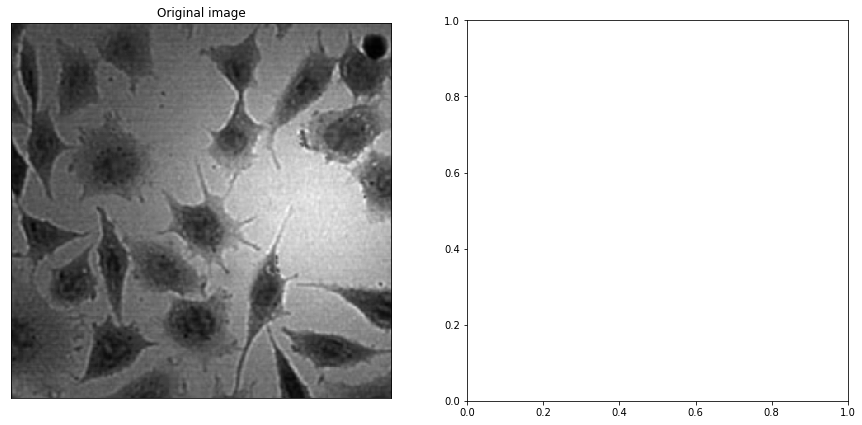

In [38]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('cell.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
#cimg = np.int16(img)  

# YOUR CODE HERE
#cimg = cv2.threshold(img,75,255,cv2.THRESH_BINARY)
# END OF YOUR CODE

# Convert back to uint8 values
#cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg)
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

<strong style="color: red">Programming Task:</strong> Apply CLAHE to the image prior to binarization. How does the result compare now to applying binarization without contrast improvement?

In [ ]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('cell.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
cimg = img 
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

Alternatively, OpenCV offers adaptive methods to cope with the contrast and illumination issue. Have a look at <code>adaptiveThreshold</code> in OpenCV's documentation. It exploits the same principle for image binarization as the simple approach, with the addition that the threshold value is determined individually for each image pixel.

<img src="multiplethresholding.png" />

<strong>Figure 2.</strong> Thresholding with multiple thresholds. (a) original CT-scan image; (b) thresholded CT-scan image with multiple thresholds.

<strong style="color: red">Programming Task:</strong> Apply the <code>adpativeThreshold()</code> function to the cell.png image. Your result should look similar to Figure 1h.

In [ ]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('cell.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
cimg = img 
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

Unfortunately, OpenCV does not provide out-of-the-box solutions for applying multiple thresholds for image segmentation. However, it should be not too difficult to adapt the first method you have implemented and use multiple thresholds.

<strong style="color: red">Programming Task:</strong> Adapt the first method to allow multiple thresholds and segment the ct_scan.png image. Your result should look similar to Figure 2b, depending on the number of chosen thresholds and parameters.

In [ ]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('cell.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
cimg = img 
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

<a name="task2"></a>
<h3 style="color: red">Task 2: More Advanced Low-level Segmentation</h3>

<h3>Clustering with K-Means Algorithm</h3>

By now, you have learned how to segment an image based on its pixel values. However, this simple result often does not lead to satisfactory results. It might be necessary not only to assign a bigger number of threhsold but also to account for neighborhoods of pixels. Thus, we cluster pixels based on both their values and proximity to surrounding pixels.

The K-means algorithm follows exactly such a segmentation approach:

<ol>
    <li>Pick $K$ cluster centers in the the image histogram: $c_1,c_2,...,c_K$. Picking can either be random or based on a defined heuristic.</li>
    <li>Assign each pixel in the image to the cluster that minimizes the distance between the pixel and the cluster center: for each point $p$, find the closest center $c_i$. Assign $p$ to $c_i$</li>
    <li>Recalculate the cluster centers by averaging all of the pixels in the cluster: $c_i$ is the mean of all points assigned to cluster $i$</li>
    <li>Repeat steps 2 and 3 until convergence (i.e. no pixels change clusters).</li>
</ol>

The algorithm always converges, however, it does not necessarily find the global minimum of the objective function

$$ \sum_\text{clusters i} \sum_\text{points p in cluster i} ||p - c_i||^2$$

The quality of the resulting segmentation depends on the initial picking of the cluster centers and $K$'s value.

<img src="kmeans.png" />

<strong>Figure 3.</strong> Segmentation with K-means clustering algorithm. (a) original image of wound; (b) applied K-means clustering (K=8); (c) applied K-means clustering (K=5).

<strong style="color:red">Programming Task:</strong> Implement K-means segmentation with OpenCV. Apply your implementation to the wound.jpg image.

In [ ]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('wound.jpg',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
cimg = img 
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg)
plt.title('Segmented image'), plt.xticks([]), plt.yticks([])
plt.show()

<h3>Mean-shift segmentation</h3>

Another advanced and versatile clustering technique is the mean-shift segmentation and is very useful for damping shading or tonality differences in localized objects. It performs an iterative search for modes.

<img src="meanshiftkmeans.png" />

<strong>Figure 4.</strong> Segmentation using mean-shift and K-means clustering: (a) original wound image, (b) result of mean-shift segmentation; (c) result of applied K-means clustering

<strong style="color: red">Reading Task: </strong> <a href="https://docs.opencv.org/3.4/db/df8/tutorial_py_meanshift.html" target="_blank">Please read OpenCV's introduction to Mean-shift</a> (skip the Camshift part).

<strong style="color: red">Programming Task: </strong> Apply the method to wound.jpg.  Make use of the <code>kmeans()</code> function. Consider using Gaussian smoothing prior to mean-shift segmentation. Pick meaningful parameters. <strong style="color: green; background: blue;">Your results should look similar to... </strong>

In [ ]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('wound.jpg',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
cimg = img 
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg)
plt.title('Segmented image'), plt.xticks([]), plt.yticks([])
plt.show()

<a name="task3"></a>
<h3 style="color: red">Task 3: Edge-Based Segmentation</h3>

In the lecture, you have been presented edge detection techniques. Edge detection looks for discontinuities in brightness in the image. A popular edge detector is the Canny edge detector. Another useful technique is the Sobel edge detector.

<img src="edgedetection.png" />

<strong>Figure 5.</strong> Edge detection: (a) original CT-scan image; (b) edge detection with Canny's method; (c) emphasized edges using the Sobel operator.

<h3>Canny Edge Detector</h3>
A very popular edge detector is the Canny edge detector (John F. Canny, 1986). The algorithm includes the following steps:

<ol>
    <li>Apply Gaussian bluring to smooth the image and remove noise.</li>
    <li>Find the image gradient</li>
    <li>Apply non-maximum suppression to get rid of spurious response (thin multi-pixel wide ridges down to single-pixel width)</li>
    <li>Apply two thresholds <em>low</em> and <em>high</em> to determine potential edges</li>
        <li>Track the edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to the strong edge. Find strong edges with $k_\text{high}$, to start an edge chain, and continue with $k_\text{low}$ to find weak edges which continue the edge chain. Typically, the ratio of $k_\text{high}$ and $k_\text{low}$ is 2.</li>
</ol>

<strong style="color: red">Reading Task</strong>: For an in-detail explanation of the detector algorithm, have a look at <a href="https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html" target="_blank">openCV's Canny Edge Detection tutorial.</a>

<strong style="color: red">Programming Task</strong>: Using OpenCV's <code>Canny()</code> function, apply the method to the ct_scan.png image. Experiment with different parameters and tune to optimum performance.

In [ ]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('ct_scan.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
cimg = img 
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Edges in image'), plt.xticks([]), plt.yticks([])
plt.show()

<h3>Sobel Edge Detector</h3>

The Sobel edge detector (also known as Sobel operator or Sobel filter, after Irwin Sobel) emphasizes edges in an image. It is a discrete differentiation operator, approximating the image gradient: at each image pixel, the result of the Sobel operator is either the corresponding gradient vector or the vector norm. The Sobel operator convolves the image with a small, separable and integer-valued filter in both horizontal and vertical directions and is thus computationally inexpensive. However, the gradient approximation that it proeuces is relatively crude, in particular for high-frequency variations in the image.

<strong style="color: red">Reading Task</strong>: Read <a href="https://docs.opencv.org/3.2.0/d2/d2c/tutorial_sobel_derivatives.html">OpenCV's tutorial on the Sobel operator</a>. Notice that the <code>Sobel()</code> function allows for calculation of the first, second, third and mixed image derivatives.

<strong style="color: red">Programming Task</strong>: Using OpenCV's <code>Sobel()</code> function, apply the method to the ct_scan.png image. Note that you will need to apply it twice: for the gradients on both directions $x$ and $y$. Your result should look similar to Figure 5c.

In [ ]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('ct_scan.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
cimg = img 
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Edges in image'), plt.xticks([]), plt.yticks([])
plt.show()

<a name="task4"></a>
<h3 style="color: red">Task 4: Graph-cut Segmentation</h3>

In Computer Vision, graph cuts can be utilized to solve a wide variety of low-level CV problems, such as image smoothing, the stereo correspondance problem, image segmentation, and many more problems that can be formulated in terms of energy minimization. A graph-based segmentation approach  makes use of solutions of the max-flow/min-cut problem between the source and sink node in a directed graph.

The procedure is as follows: The set of graph nodes is equal to the set of pixels in the image. Every pixel is connnected wth its 4-neighborhood (or, alternatively, 8-neighborhood). For the selection of weights, several different models can be chosen from, such as image gradients for identifying sharp edges, or consideration of mean intensities of the foreground object and the background.

<strong><em>Did you know?</em></strong> A graph-cut-based segmentation tool is available in Microsoft Word.

<img src="graphcut.png" />

<strong>Figure 6.</strong> Graph-cut segmentation: (a,c) original images; (b,d) segmented images.

<strong style="color: red">Reading Task</strong>: <a href="https://docs.opencv.org/3.1.0/d8/d83/tutorial_py_grabcut.html" target="_blank">Read OpenCV's Tutorial on <em>GrabCut</em></a>, a graph-based approach to segmentation that allows specifying a rectangle around an object of interest and tries to separate the object from its background. 

<strong style="color: red">Programming Task</strong>: Using OpenCV's <code>grabCut()</code> function, apply the grabCut method to the tooth.jpg and melanoma.jpg images. Separate the tooth and the mole from its backgrounds. Select values fo the bounding rectangle and the number of iterations to allow optimum segmentation. Your results should look similar to those presented in Figure 6.

In [ ]:
%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

img_tooth = cv2.imread('tooth.jpg')
img_melanoma = cv2.imread('melanoma.jpg')

# YOUR CODE HERE
cimg_tooth = img_tooth
cimg_melanoma = img_melanoma 
# END OF YOUR CODE

# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img_tooth[:,:,::-1])
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg_tooth[:,:,::-1])
plt.title('Binarized image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121), plt.imshow(img_melanoma[:,:,::-1])
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg_melanoma[:,:,::-1])
plt.title('Segmented image'), plt.xticks([]), plt.yticks([])
plt.show()